In [2]:
import glob
import lasio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import binarize
from colorsys import hsv_to_rgb
from random import randint, uniform
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

%matplotlib inline

In [124]:
wells = glob.glob(r'E:\UT Austin\Datasets\LAS_files\mannville_demo_data\*.las')

In [146]:
lasio.read(wells[50]).curves['DEPT'].unit

'M'

In [147]:
uwi =[]
datum = []
ground = []
for well in wells:
    curve = lasio.read(well)
    try:
        if curve.params['GL'].unit == 'M' and (curve.curves['DEPT'].unit !='F' or curve.curves['DEPTH'].unit != 'F'):
            da = curve.params['DATM'].value
            gl = curve.params['GL'].value
            u = curve.well['UWI'].value
            uwi.append(u)
            datum.append(da)
            ground.append(gl)
    except:
        print('failure')


well_dict = pd.read_csv(r'mann_well_dict.csv')

dataframe = pd.DataFrame({"UWI":uwi, "DATUM":datum, "GL":ground})

new_df = pd.merge(dataframe, well_dict,  how='left', left_on=['UWI'], right_on = ['UWI'])

failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure


Header section Parameter regexp=~P was not found.


failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure
failure


In [148]:
new_df

,UWI,DATUM,GL,SitID,UWI (AGS)
0,00/01-01-073-05W5/0,583.300,583.300,142218.0,0735050101000
1,00/01-01-095-19W4/0,650.200,646.800,144992.0,0954190101000
2,00/01-03-085-15W400,532.680,528.690,NaN,NaN
3,00/01-04-075-23W4/0,715.000,715.000,153654.0,0754230401000
4,00/01-05-085-15W400,535.500,531.900,NaN,NaN
...,...,...,...,...,...
1961,AB/16-28-095-10W400,302.971,302.057,NaN,NaN
1962,AC/03-04-093-11W400,336.600,336.600,NaN,NaN
1963,AC/15-07-093-12W400,432.800,432.800,NaN,NaN
1964,AC/15-31-097-10W400,254.200,254.200,NaN,NaN


In [149]:
tops = pd.read_csv(r"mannvillegrp_picks.csv") #read in the top data
tops.rename(columns={'Pick':'SS'}, inplace=True)

new_df = pd.merge(tops, new_df,  how='left', left_on=['SitID'], right_on = ['SitID'])

not_nullDF = new_df.loc[new_df['UWI'].notnull()]

not_nullDF['TVDSS'] = (not_nullDF.GL-(not_nullDF.DATUM-not_nullDF.SS)).values

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
not_nullDF.to_csv('mannville_cleaned.csv')

# Below are the predictions, above is cleaning

In [3]:
tops = pd.read_csv(r"mannville_cleaned.csv", index_col=[0]) #read in the top data
#tops.rename(columns={'TVDSS':'SS'}, inplace=True)

In [4]:
#tops.drop(tops[tops.SitID==123627].index.values, inplace=True)
ssmin = tops.TVDSS.min()
tops.TVDSS = tops.TVDSS - ssmin #standardize the subsea values

tops.dropna(inplace=True)


In [5]:
#tops = tops[tops.Quality == 3]

In [6]:
#tops.drop(['MD', 'GL', 'DELEV', 'DT'], axis=1, inplace=True)
def sample_splitter(dataframe, fraction, randomseed):
    test = dataframe.sample(frac=fraction, random_state=randomseed)
    test_idx = test.index.values
    train =  dataframe.drop(test_idx)
    return train, test

train, test = sample_splitter(tops, 0.2, 91)

print(f'Training size is {len(train)} tops, and test size is {len(test)} tops')

D_df = train.pivot_table("TVDSS", "Formation", "SitID").fillna(0)#pivot table to move into sparse matrix land
R = D_df.values
A = binarize(R) 

Training size is 10874 tops, and test size is 2718 tops


In [7]:
print(f'{round(((D_df == 0).astype(int).sum().sum())/((D_df == 0).astype(int).sum().sum()+(D_df != 0).astype(int).sum().sum()),3)*100} percent of the tops are missing')

45.5 percent of the tops are missing


In [8]:
print(f'There are {len(tops.UWI.unique())} wells and {len(tops.Formation.unique())} tops')

There are 1424 wells and 14 tops


In [9]:
tops

,SitID,Formation,SS,Quality,UWI,DATUM,GL,UWI (AGS),TVDSS
0,102496,1000,321.0,1,00/12-08-067-01W4/0,613.4,609.53,0674010812000,502.83
4,102496,5000,438.0,2,00/12-08-067-01W4/0,613.4,609.53,0674010812000,619.83
6,102496,7000,458.0,3,00/12-08-067-01W4/0,613.4,609.53,0674010812000,639.83
7,102496,9000,468.0,3,00/12-08-067-01W4/0,613.4,609.53,0674010812000,649.83
8,102496,9500,468.0,3,00/12-08-067-01W4/0,613.4,609.53,0674010812000,649.83
...,...,...,...,...,...,...,...,...,...
30655,183527,10000,594.0,1,00/09-09-074-02W5/0,639.0,636.00,0745020909000,776.70
30656,183527,11000,600.0,1,00/09-09-074-02W5/0,639.0,636.00,0745020909000,782.70
30657,183527,12000,600.0,1,00/09-09-074-02W5/0,639.0,636.00,0745020909000,782.70
30658,183527,13000,600.0,1,00/09-09-074-02W5/0,639.0,636.00,0745020909000,782.70


In [10]:
#ALS factorization from 
# https://github.com/mickeykedia/Matrix-Factorization-ALS/blob/master/ALS%20Python%20Implementation.py
# here items are the formation and users are the well
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    #print("Initiating ")
    lambda_ = lambda_
    n_factors = n_factors
    n, m = A.shape
    n_iterations = n_iterations
    np.random.seed(86)
    Users = 5 * np.random.rand(n, n_factors, )
    Items = 5 * np.random.rand(n_factors, m)

    def get_error(A, Users, Items, R):
        # This calculates the MSE of nonzero elements
        return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

    MAE_List = []

    print("Starting Iterations")
    for iter in range(n_iterations):
        for i, Ri in enumerate(R):
            Users[i] = np.linalg.solve(
                np.dot(Items, np.dot(np.diag(Ri), Items.T))
                + lambda_ * np.eye(n_factors),
                np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
            ).T
     #   print(
     #       "Error after solving for User Matrix:",
     #       get_error(A, Users, Items, R),
     #   )

        for j, Rj in enumerate(R.T):
            Items[:, j] = np.linalg.solve(
                np.dot(Users.T, np.dot(np.diag(Rj), Users))
                + lambda_ * np.eye(n_factors),
                np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
            )
     #   print(
     #       "Error after solving for Item Matrix:",
     #       get_error(A, Users, Items, R),
     #   )

        MAE_List.append(get_error(A, Users, Items, R))
     #   print("%sth iteration is complete..." % iter)
    
   # print(MSE_List)
   # fig = plt.figure()
   # ax = fig.add_subplot(111)
   # plt.plot(range(1, len(MSE_List) + 1), MSE_List); plt.ylabel('Error'); plt.xlabel('Iteration')
   # plt.title('Python Implementation MSE by Iteration \n with %d formations and %d wells' % A.shape);
    # plt.savefig('Python MSE Graph.pdf', format='pdf')
    return Users, Items

U, Vt = runALS(R, A, 4, 50, 0.1)

recommendations = np.dot(U, Vt) #get the recommendations

recsys = pd.DataFrame(
    data=recommendations[0:, 0:], index=D_df.index, columns=D_df.columns
) #results

newDF = recsys.T
newDF.reset_index(inplace=True)

flat_preds = pd.DataFrame(recsys.unstack()).reset_index()

new_df = pd.merge(test, flat_preds,  how='left', left_on=['SitID','Formation'], right_on = ['SitID','Formation'])

new_df.rename(columns={0:'SS_pred'}, inplace=True)

cleanDF = new_df.dropna()

cleanDF['signed_error'] = (cleanDF['TVDSS'] - cleanDF['SS_pred'])

print(MAE(cleanDF.SS.values-ssmin, cleanDF.SS_pred.values-ssmin))
print(np.sqrt(MSE(cleanDF.SS.values-ssmin, cleanDF.SS_pred.values-ssmin)))

Starting Iterations
184.3239742173416
184.99449644016028


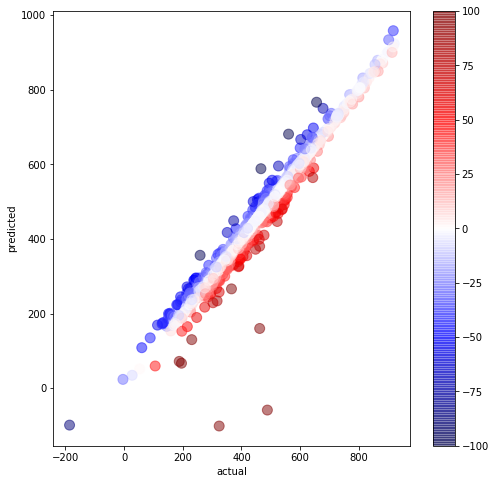

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(cleanDF.TVDSS+ssmin, cleanDF.SS_pred+ssmin, c=cleanDF.signed_error, vmin=-100,vmax=100, 
            cmap='seismic', s=100, alpha=0.5)
plt.plot()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.colorbar()

In [12]:
cleanDF.sort_values(['signed_error'])

,SitID,Formation,SS,Quality,UWI,DATUM,GL,UWI (AGS),TVDSS,SS_pred,signed_error
1417,122341,14000,466.34,1,00/11-29-094-21W4/0,0.000,0.000,0944212911000,652.04,773.843135,-121.803135
1404,124904,14000,564.00,1,00/10-06-096-21W4/0,822.900,819.400,0964210610000,746.20,866.473714,-120.273714
2024,107423,14000,655.93,1,00/10-33-072-25W4/0,664.159,664.159,0724253310000,841.63,951.971917,-110.341917
1886,117874,3000,259.08,2,00/10-13-089-24W4/0,508.650,508.650,0894241310000,444.78,541.853043,-97.073043
863,114783,1000,272.90,1,AA/11-07-084-08W4/0,730.920,272.320,0844080711AA0,0.00,86.749020,-86.749020
...,...,...,...,...,...,...,...,...,...,...,...
575,171516,2000,191.50,1,00/07-36-093-19W4/0,524.600,521.100,0934193607000,373.70,257.472975,116.227025
713,120278,2000,199.50,1,00/10-18-092-20W4/0,536.950,533.150,0924201810000,381.40,252.611791,128.788209
2532,125575,2000,462.08,1,00/14-05-097-21W4/0,330.500,330.500,0974210514000,647.78,345.709108,302.070892
1364,144992,2000,327.50,1,00/01-01-095-19W4/0,650.200,646.800,0954190101000,509.80,84.274734,425.525266


In [14]:
def cross_validation(dataframe, random_seed, latent_vectors, n_iters):
    np.random.seed(random_seed)
    block_1  = np.random.choice(dataframe.index, size=dataframe.shape[0]//4)
    tops2 = dataframe.drop(block_1)
    block_2 = np.random.choice(tops2.index, size=tops.shape[0]//4)
    tops3 = tops2.drop(block_2)
    block_3 = np.random.choice(tops3.index, size=tops.shape[0]//4)
    tops4 = tops3.drop(block_3)
    block_4 = np.random.choice(tops4.index, size=tops.shape[0]//4)
    blocks = [block_1, block_2, block_3, block_4]
    CV_MAE = []
    CV_MSE = []
    for block in blocks:
        validate = dataframe.loc[block]
        main_group = dataframe.drop(block)
        print(f'Validating on {block.shape[0]} tops')
        D_df = main_group.pivot_table("TVDSS", "Formation", "SitID").fillna(0)#pivot table to move into sparse matrix land
        R = D_df.values
        A = binarize(R) 

        
        U, Vt = runALS(R, A, latent_vectors, n_iters, 0.1)

        recommendations = np.dot(U, Vt) #get the recommendations

        recsys = pd.DataFrame(
            data=recommendations[0:, 0:], index=D_df.index, columns=D_df.columns
        ) #results

        newDF = recsys.T
        newDF.reset_index(inplace=True)

        flat_preds = pd.DataFrame(recsys.unstack()).reset_index()

        new_df = pd.merge(validate, flat_preds,  how='left', left_on=['SitID','Formation'], right_on = ['SitID','Formation'])

        new_df.rename(columns={0:'SS_pred'}, inplace=True)

        cleanDF = new_df.dropna()

        cleanDF['signed_error'] = (cleanDF['TVDSS'] - cleanDF['SS_pred'])

        CV_MAE.append(MAE(cleanDF.SS.values-ssmin, cleanDF.SS_pred.values-ssmin))
        CV_MSE.append(np.sqrt(MSE(cleanDF.SS.values-ssmin, cleanDF.SS_pred.values-ssmin)))

    return CV_MSE

In [15]:
cross_validation(tops, 86, 3, 40)

Validating on 3398 tops
Starting Iterations


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Validating on 3398 tops
Starting Iterations


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Validating on 3398 tops
Starting Iterations
Validating on 3398 tops
Starting Iterations


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[185.52029442334205, 186.56212128064027, 186.6776067282794, 186.65437101591215]

In [121]:
np.mean(cross_validation(tops, 86, 3, 40))

Validating on 3503 tops
Starting Iterations
Validating on 3503 tops
Starting Iterations


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Validating on 3503 tops
Starting Iterations
Validating on 3503 tops
Starting Iterations


1663.8116068836957